In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from model import MarketABM
from analysis import compute_metrics, run_tests, ks_test_returns
from visualization import plot_series, plot_spread, plot_return_hist

plt.rcParams["figure.figsize"] = (10, 4)


In [2]:
def run_many(
    n_runs: int,
    with_hft: bool,
    with_mm: bool,
    seed0: int = 1,
    T_steps: int = 2500
):
    dfs = []
    metrics = []

    for i in range(n_runs):
        model = MarketABM(
            seed=seed0 + i,
            with_hft=with_hft,
            with_mm=with_mm,
            T_steps=T_steps,
            n_fund=30,
            n_noise=40,
            n_hft=20,
            n_mm=5
        )

        df = model.run()
        dfs.append(df)
        metrics.append(compute_metrics(df))

    return dfs, metrics


In [3]:
N_RUNS = 20

# 4 scenarios
dfs_00, m_00 = run_many(N_RUNS, with_hft=False, with_mm=False, seed0=10)
dfs_01, m_01 = run_many(N_RUNS, with_hft=False, with_mm=True,  seed0=100)
dfs_10, m_10 = run_many(N_RUNS, with_hft=True,  with_mm=False, seed0=200)
dfs_11, m_11 = run_many(N_RUNS, with_hft=True,  with_mm=True,  seed0=300)


/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empty slice
  "avg_spread": np.nanmean(spread),
/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empty slice
  "avg_spread": np.nanmean(spread),
/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empty slice
  "avg_spread": np.nanmean(spread),
/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empty slice
  "avg_spread": np.nanmean(spread),
/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empty slice
  "avg_spread": np.nanmean(spread),
/Users/adeliagainullina/Documents/Financial_Mathematics_ABM_Modelling_Project/project/analysis.py:17: RuntimeWarning: Mean of empt

In [4]:
summary = pd.DataFrame({
    "Baseline": pd.Series(m_00).apply(lambda x: x["realized_vol"]),
    "MM only": pd.Series(m_01).apply(lambda x: x["realized_vol"]),
    "HFT only": pd.Series(m_10).apply(lambda x: x["realized_vol"]),
    "HFT + MM": pd.Series(m_11).apply(lambda x: x["realized_vol"]),
})

summary.describe()


,Baseline,MM only,HFT only,HFT + MM
count,20.000000,20.000000,20.000000,20.000000
mean,0.034233,0.037052,0.040049,0.039515
std,0.000503,0.000654,0.000817,0.000570
min,0.033250,0.035864,0.038573,0.038187
25%,0.033924,0.036472,0.039560,0.039202
50%,0.034362,0.037123,0.040202,0.039588
75%,0.034525,0.037511,0.040732,0.039865
max,0.035259,0.038051,0.041259,0.040500


In [5]:
run_tests(m_00, m_01, key="avg_spread")


{'t_test': {'stat': nan, 'p': nan, 'reject': False}}

In [6]:
run_tests(m_00, m_10, key="realized_vol")


{'t_test': {'stat': -27.100317610428746,
  'p': 1.9125114389259053e-23,
  'reject': True},
 'mann_whitney': {'stat': 0.0, 'p': 6.795615128173357e-08, 'reject': True}}

In [7]:
run_tests(m_10, m_11, key="realized_vol")


{'t_test': {'stat': 2.398765146116012,
  'p': 0.02209210302692274,
  'reject': True},
 'mann_whitney': {'stat': 283.0, 'p': 0.025639272008805575, 'reject': True}}

In [8]:
ks_test_returns(dfs_10[0], dfs_11[0])


{'ks_stat': 0.0196078431372549, 'p': 0.7227918230030436, 'reject': False}

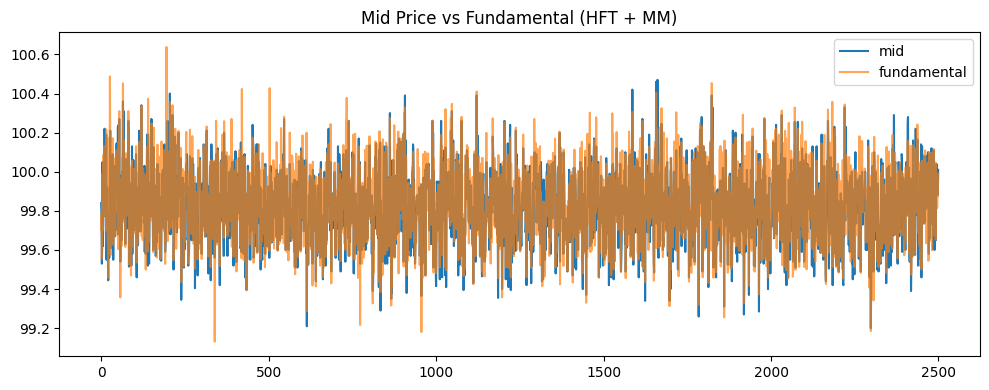

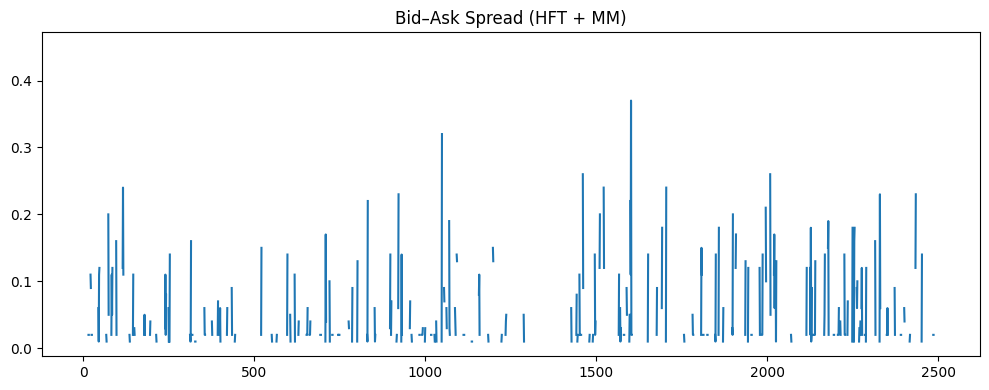

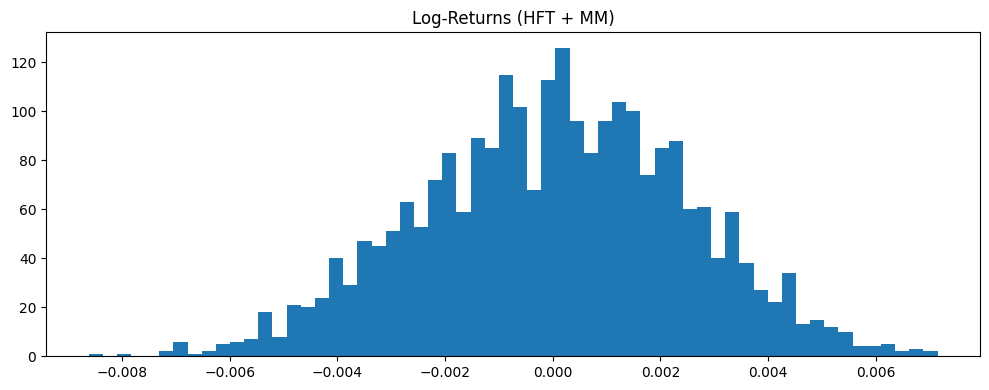

In [9]:
df_example = dfs_11[0]

plot_series(df_example, title="Mid Price vs Fundamental (HFT + MM)")
plot_spread(df_example, title="Bid–Ask Spread (HFT + MM)")
plot_return_hist(df_example, title="Log-Returns (HFT + MM)")

plt.show()
